<a href="https://colab.research.google.com/github/Krishnapabbu17/diamonds-analysis/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import kagglehub

Reading in Data

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("diamonds.csv")
df.head()
# View first few rows
df.head()


Saving diamonds.csv to diamonds.csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Github

Checking for missing/duplicate values

In [4]:
# Check how many missing values per column
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# To see if there are *any* missing values anywhere
print("\nAny missing values in dataset?:", df.isnull().values.any())


Missing values per column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Any missing values in dataset?: False


In [5]:
# Number of duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Optionally, show duplicate rows if any
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])


Number of duplicate rows: 0


In [6]:
# Find rows where any dimension is zero
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

# Step 1: Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

# Step 2: Remove rows where any dimension is 0 (invalid)
original_shape = df.shape
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
cleaned_shape = df.shape

# Step 3: Show how many rows were removed
print(f"Original rows: {original_shape[0]}")
print(f"Cleaned rows: {cleaned_shape[0]}")
print(f"Removed rows: {original_shape[0] - cleaned_shape[0]}")

Original rows: 53940
Cleaned rows: 53920
Removed rows: 20


In [7]:
print("Cut values:\n", df['cut'].value_counts())
print("\nColor values:\n", df['color'].value_counts())
print("\nClarity values:\n", df['clarity'].value_counts())


Cut values:
 cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

Color values:
 color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

Clarity values:
 clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64


In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#Reorder categorical columns
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # D is best, J is worst
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)


In [10]:
df[['x', 'y', 'z']].min()


,0
x,3.73
y,3.68
z,1.07


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#Outliers(too high)
df[df['y'] > 30]
df[df['z'] > 20]

#simple fix
df = df[df['z'] < 10]


In [13]:
#Outliers(too high)
df[df['x'] > 10]
df[df['y'] > 10]

#Simple fix
df = df[(df['x'] < 30) & (df['y'] < 30) & (df['z'] < 30)]


In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
#Renaming columns
df = df.rename(columns={
    'carat': 'carat_weight',
    'cut': 'cut_quality',
    'color': 'color_grade',
    'clarity': 'clarity_grade',
    'depth': 'depth_percent',
    'table': 'table_percent',
    'price': 'price_usd',
    'x': 'length_mm',
    'y': 'width_mm',
    'z': 'depth_mm'
})


In [16]:
df.head()

,carat_weight,cut_quality,color_grade,clarity_grade,depth_percent,table_percent,price_usd,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


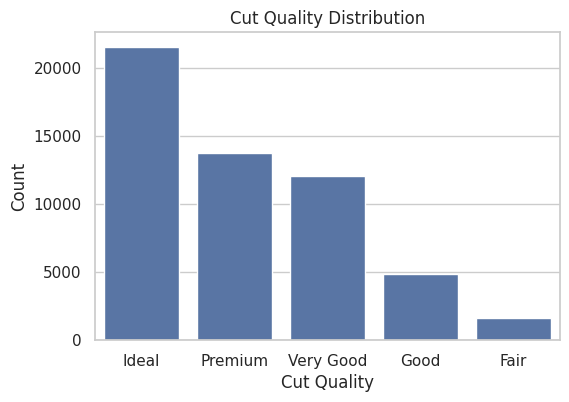

In [17]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set(style="whitegrid")

#Class Distribution of Target
plt.figure(figsize=(6, 4))
sns.countplot(x='cut_quality', data=df, order=df['cut_quality'].value_counts().index)
plt.title('Cut Quality Distribution')
plt.ylabel('Count')
plt.xlabel('Cut Quality')
plt.show()


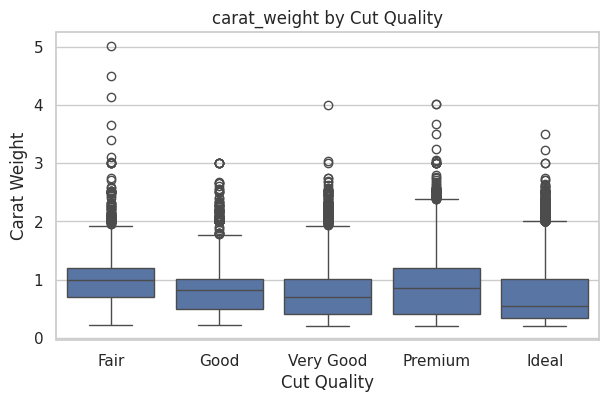

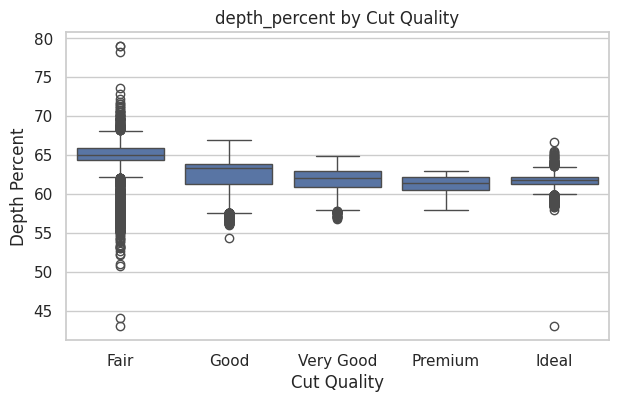

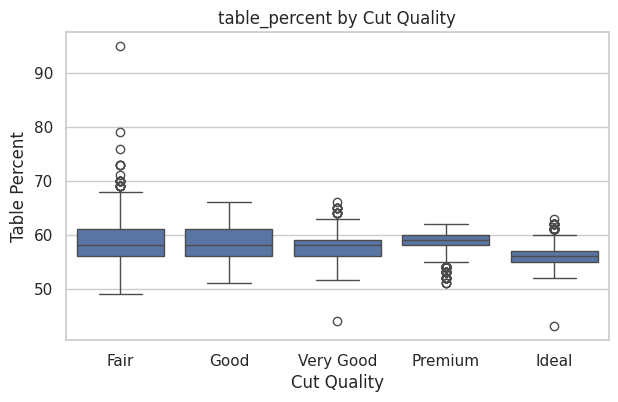

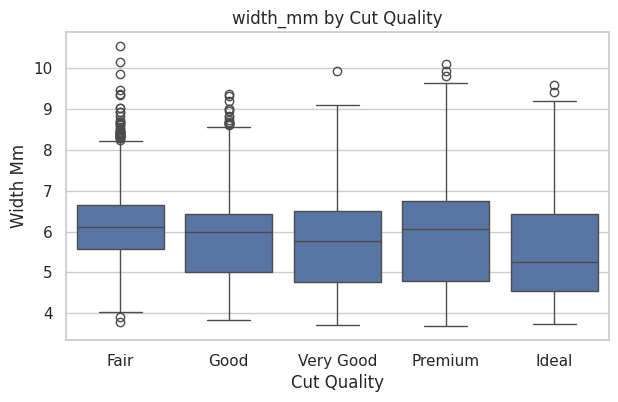

In [18]:
# Boxplots of Numeric Features by Cut Quality
numeric_features = ['carat_weight', 'depth_percent', 'table_percent', 'width_mm']

for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='cut_quality', y=feature, data=df)
    plt.title(f'{feature} by Cut Quality')
    plt.xlabel('Cut Quality')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()


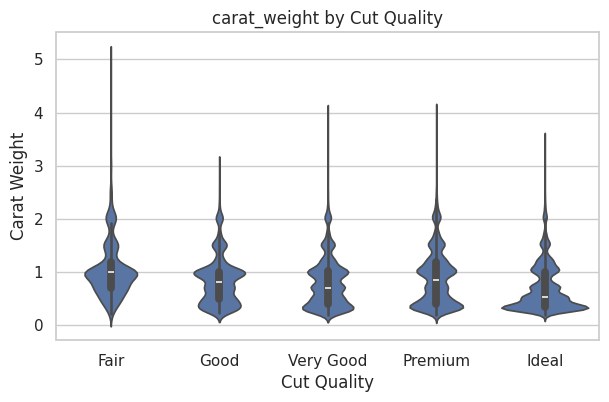

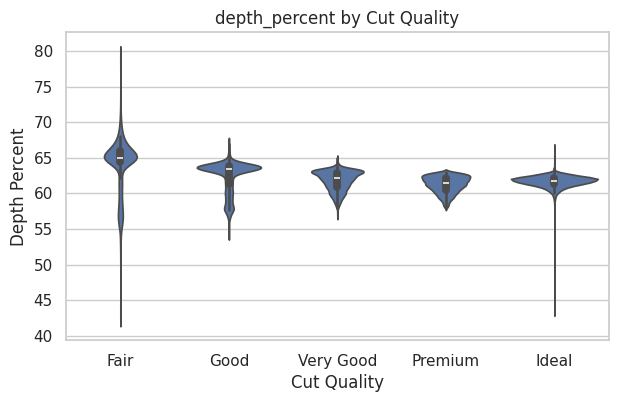

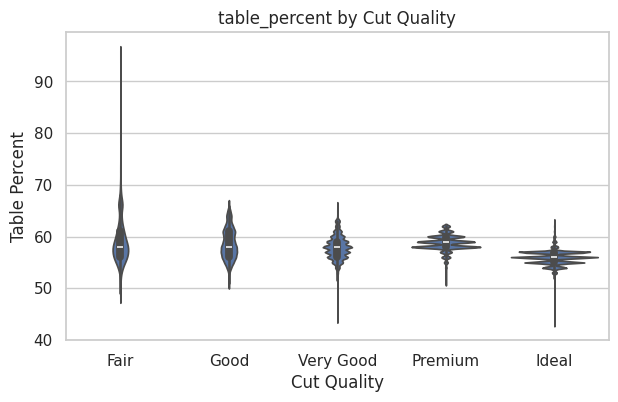

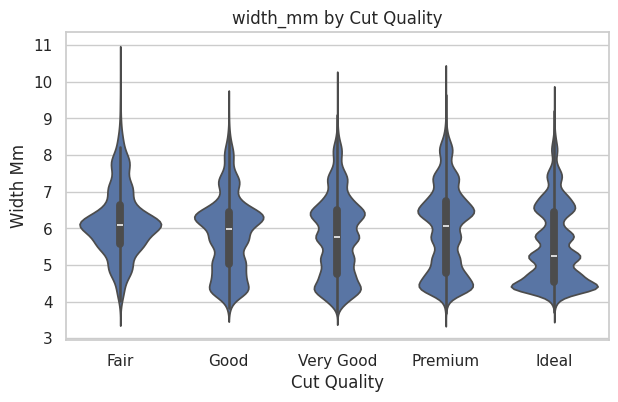

In [19]:
# Violin Plots (optional alternative to boxplots)
for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.violinplot(x='cut_quality', y=feature, data=df)
    plt.title(f'{feature} by Cut Quality')
    plt.xlabel('Cut Quality')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()


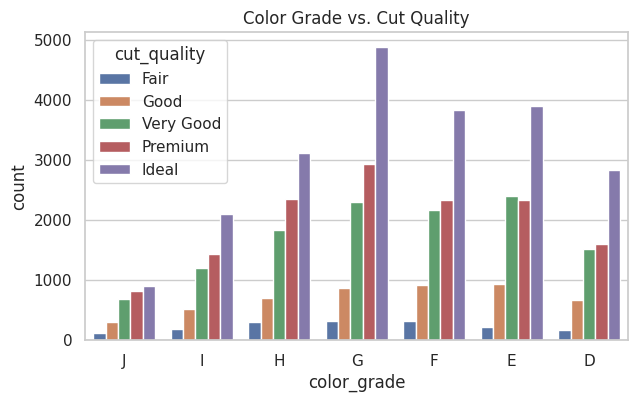

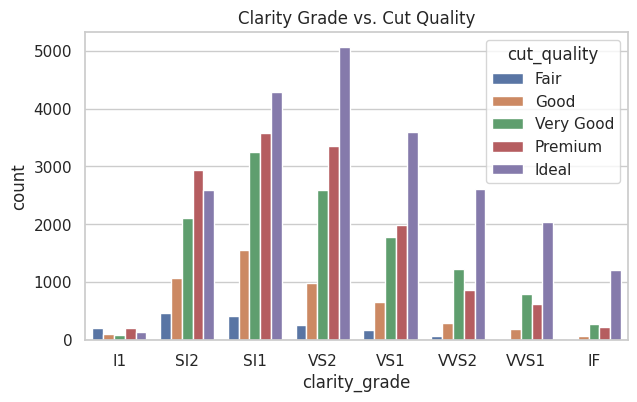

In [20]:
#  Categorical Feature vs. Target (Color and Clarity)
plt.figure(figsize=(7, 4))
sns.countplot(x='color_grade', hue='cut_quality', data=df)
plt.title('Color Grade vs. Cut Quality')
plt.show()

plt.figure(figsize=(7, 4))
sns.countplot(x='clarity_grade', hue='cut_quality', data=df)
plt.title('Clarity Grade vs. Cut Quality')
plt.show()


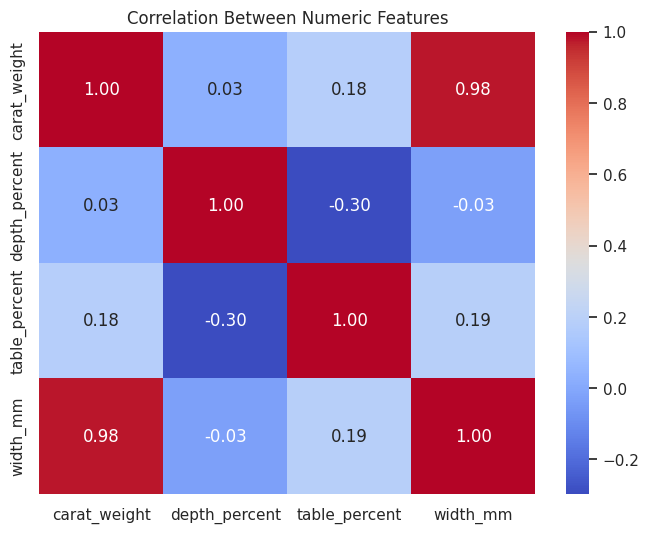

In [21]:
# Correlation Heatmap of Numeric Features

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()
